In [32]:
import subprocess
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from graphviz import Source

from IPython.display import Image

# Importing dataset

Dataset from: https://archive.ics.uci.edu/ml/datasets/Wine

In [2]:
target = 'Class'

columns = [
    'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
    'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline            '
]

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=[target] + columns, header=False
)

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
X = df[columns]
y = df[target]

# Spliting dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

# Training tree

In [42]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Exporting tree

In [43]:
export_graphviz(tree, out_file='tree.dot', feature_names=columns)


In [44]:
%%bash
dot -Tpng tree.dot -o tree.png


# Printing tree

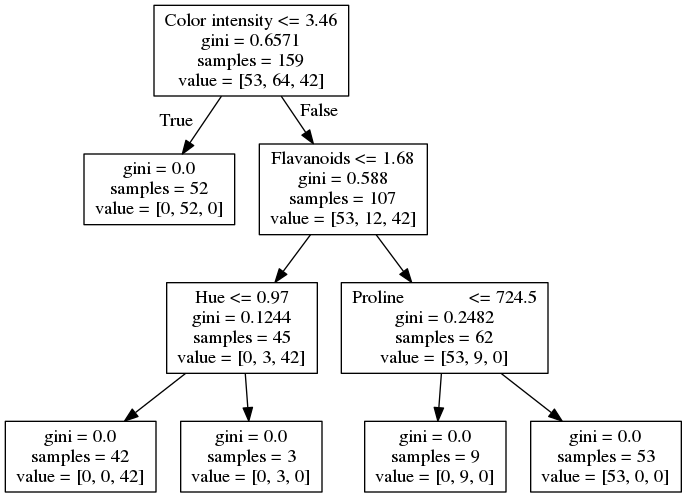

In [45]:
Image(filename='tree.png')

# Validating model

In [48]:
print 'Training Accuracy: ', tree.score(X_train, y_train)
print 'Testing Accuracy: ', tree.score(X_test, y_test)

Training Accuracy:  1.0
Testing Accuracy:  0.888888888889


In [49]:
print 'Confusion matrix:'
confusion_matrix(y_test, tree.predict(X_test))

Confusion matrix:


array([[4, 1, 0],
       [0, 6, 1],
       [0, 0, 6]])